# Prática Filtragem Espacial

**Aluno:** Euler Gomes da Rocha

Bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy import ndimage as ndi
from skimage import util, filters
from skimage.filters import window

## Carregando uma imagem colorida (RGB)

In [7]:
img_bgr = cv2.imread('./images.jpg',cv2.IMREAD_COLOR)

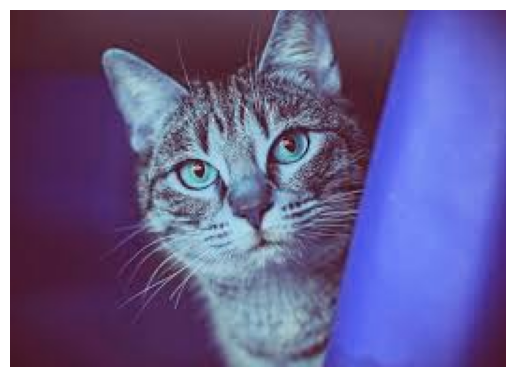

In [13]:
plt.figure()
plt.imshow(img_bgr)
plt.axis('off')
plt.show()

## Filtro de máximo com máscara 3x3

In [9]:
def max_filter(image):
    H,W = image.shape #altura e largura
    output_image = np.zeros((H,W), dtype=np.uint8) #imagem de saida só com zeros
    k = 1 #raio do kernel

    for i in range(k,H -k):
        for j in range(k,W -k):
            window = image[i-1 :  i+k+1, j-k : j+k+1] #vizinhanca 3x3
            output_image[i][j] = np.max(window)
            return output_image
    return None

## Processamento

In [10]:
print(img_bgr.shape, img_bgr.dtype, img_bgr.min(), img_bgr.max())

#dividir os canais RGB
B, G, R = cv2.split(img_bgr)
print(B.shape, G.shape, R.shape)

#aplicando o filtro
R_filter = max_filter(R)
G_filter = max_filter(G)
B_filter = max_filter(B)

 # Reconstruir a imagem BGR a partir dos canais filtrados
filtered_bgr = cv2.merge([B_filter, G_filter, R_filter])

    # Converter de BGR para RGB para exibição correta com Matplotlib
original_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
filtered_rgb = cv2.cvtColor(filtered_bgr, cv2.COLOR_BGR2RGB)

(191, 265, 3) uint8 0 253
(191, 265) (191, 265) (191, 265)


## Mostrando a imagem

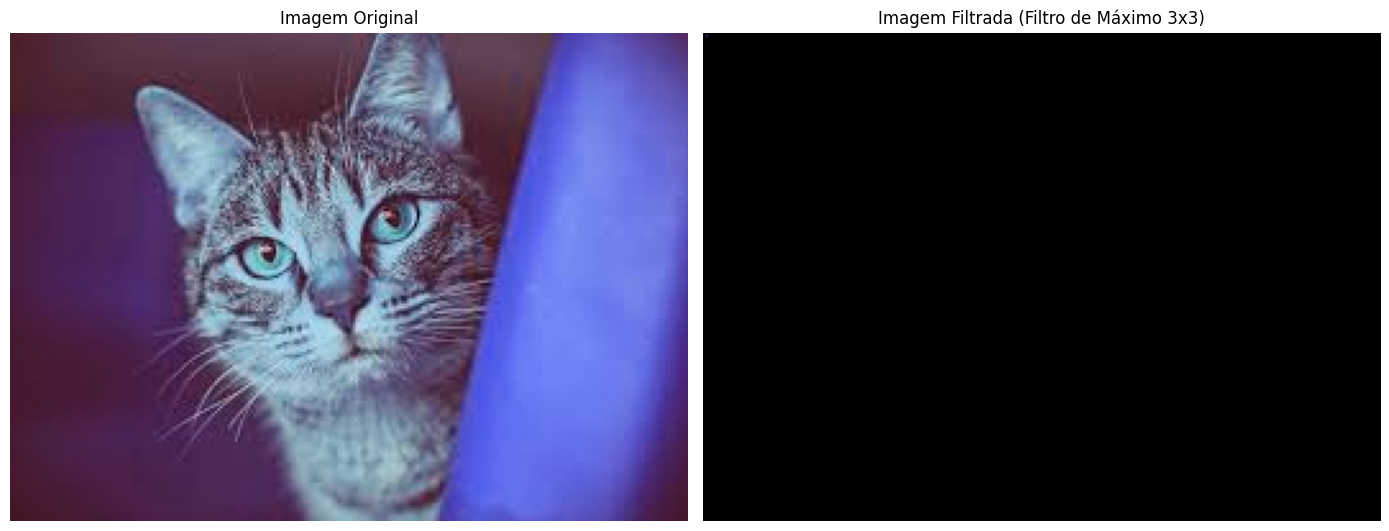

In [11]:
plt.figure(figsize=(14,10))
plt.subplot(1, 2, 1)
plt.imshow(img_bgr)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_rgb)
plt.title('Imagem Filtrada (Filtro de Máximo 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()